In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1 简单练习

  输出一个5*5的矩阵
  

In [252]:
A = np.eye(5)
A

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

# 2 单变量的线形回归

整个2的部分需要根据城市人口数量，预测开小吃店的利润
数据在ex1data1.txt里，第一列是城市人口数量，第二列是该城市小吃店利润。

## 2.1 Plotting the Data

读入数据，展示数据

In [253]:
path = 'E:\机器学习(吴恩达)\ML数据\ml_ex1\ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


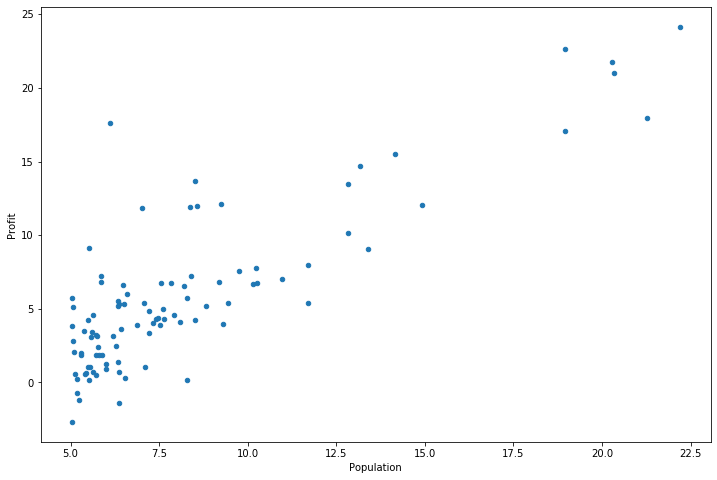

In [254]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))
plt.show()

## 2.2 梯度下降
训练线性回归的参数$\theta$

### 2.2.1 约定公式


In [255]:
def computerCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

### 2.2.2 实现
加入一列x，用于更新$\theta_0$,然后将$\theta$初始化为0，学习率初始化为0.01，迭代次数为1500次

In [256]:
data.insert(0, 'Ones', 1)   #在data第1、2列之间插入全是1的一列数
#初始化X和y
cols = data.shape[1]     # 计算data的列数 cols=3
X = data.iloc[:,:-1]     # X是data里的除最后列
y = data.iloc[:,cols-1:cols]    # y是data最后一例

In [257]:
X.head()  #head 是观察前五行

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [258]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [259]:
#代价函数应该是numpy矩阵，转换X和y，初始化theta
#首先把变量由data frames 转化为矩阵形式
X = np.matrix(X.values)
y = np.matrix(y.values)  
theta = np.matrix(np.array([0,0]))  

X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

### 2.2.3 计算J（$\theta$） 
 
 

In [260]:
computerCost(X, y, theta)

32.072733877455676

### 2.2.4 梯度下降

In [261]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))   #初始化一个临时矩阵（1， 2）
    paramenters = int(theta.ravel().shape[1])  
    cost = np.zeros(iters)   #初始化一个ndarray，包含每次iters的cost
    #利用向量化进一步求解
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(paramenters):
            term = np.multiply(error, X[:,j])
            temp[0, j] = theta[0, j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computerCost(X, y, theta)
    return theta, cost
# 实现$\theta$的更新

In [262]:
# 初始化学习率为0.01 进行迭代的次数1500
alpha = 0.01
iters = 1500
#运行梯度下降算法来将我们的参数θ适合于训练集
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.63029144,  1.16636235]])

In [263]:
#预测35000和70000城市规模的小吃摊利润
predict1 = [1, 3.5] * g.T
print("predict1:",predict1)
predict2 = [1, 7] * g.T
print("predict2:",predict2)


predict1: [[0.45197679]]
predict2: [[4.53424501]]


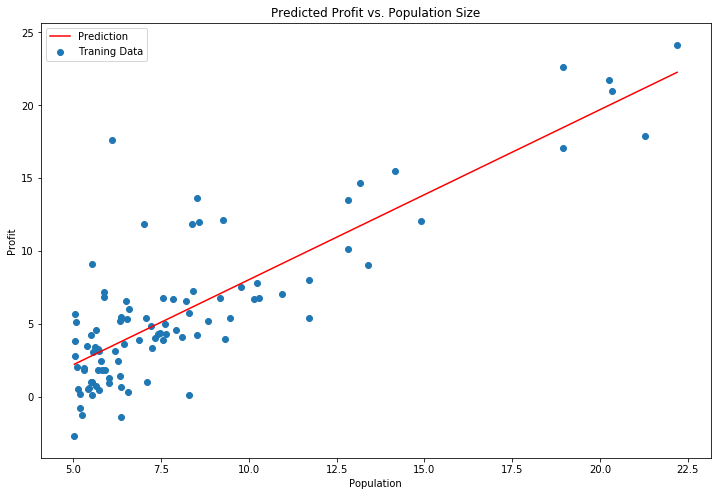

In [264]:
# 原始数据以及拟合的直线
# np.linspace()在指定的间隔内返回均匀间隔的数字。
x = np.linspace(data.Population.min(), data.Population.max(), 100)  
f = g[0, 0] + (g[0, 1] * x)

fig,ax = plt.subplots(figsize = (12, 8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc = 2)  # 2表示左上角
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()


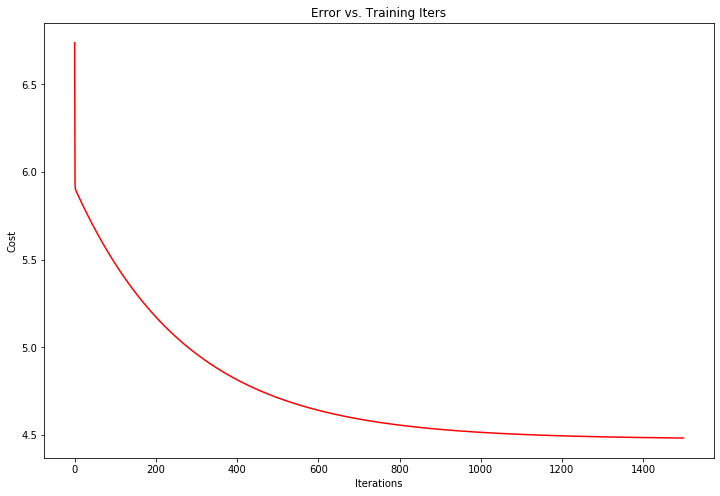

In [265]:
# 绘制梯度方程序函数也在每个训练迭代中输出一个代价的向量 
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(np.arange(iters), cost, 'r')  # np.arange()返回等差数组
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Iters')
plt.show()

# 正规方程法
正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

梯度下降与正规方程的比较：
梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型	
正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n3)$，通常来说当$n$小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [266]:
 
def normalEqn(X, y):
    theta = np.linalg.inv(X.T*X)*X.T*y   #X.T*X等价于X.T.dot(X)
    return theta.T
g11 = normalEqn(X,y)
g11

# 打印两种方法的得到的参数值
print(g,'\n',g11)

[[-3.63029144  1.16636235]] 
 [[-3.89578088  1.19303364]]


# 3 多变量的线形回归

ex1data2.txt里的数据，第一列是房屋大小，第二列是卧室数量，第三列是房屋售价
根据已有数据，建立模型，预测房屋的售价

In [267]:
path = 'E:\机器学习(吴恩达)\ML数据\ml_ex1\ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## 3.1 特征归一化 

观察数据发现，size变量是bedrooms变量的1000倍大小,统一量级会让梯度下降收敛的更快。做法就是，将每类特征减去他的平均值后除以标准差

In [268]:
data2 = (data2 -data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


## 3.2 梯度下降

In [269]:
# 加一列常数列
data2.insert(0, 'Ones', 1)
#初始化X y
cols = data2.shape[1]     # 计算data2的列数 cols=3
X2 = data2.iloc[:,:-1]     # X2是data2里的除最后列
y2 = data2.iloc[:,cols-1:cols]    # y2是data2最后一例

# 转换成matrix格式，初始化theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# 运行梯度下降算法
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)
g2


matrix([[-1.10856950e-16,  8.84042349e-01, -5.24551809e-02]])